In [1]:
def relu(x):
    if x > 0:
        return x
    else:
        return 0

In [2]:
def neuron(inputs, weights, bias, activation_function):
    temp_output = 0
    for i in range(len(inputs)):
        temp_output = temp_output + inputs[i]*weights[i]
    output = activation_function(temp_output+bias)
    return output

In [3]:
n1_inputs = [0.0, 0.0 ,0.0]
n1_weights = [0.0, 0.0 ,0.0]
n1_bias = 0.0

In [4]:
n1 = neuron(n1_inputs, n1_weights, n1_bias, relu)

In [5]:
print(n1)

0


In [6]:
%matplotlib ipympl
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import random

interactive(children=(FloatSlider(value=0.0, description='i1', max=1.0), FloatSlider(value=0.0, description='i…

<function __main__.update_neuron_params(i1, i2, i3, w1, w2, w3, b)>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
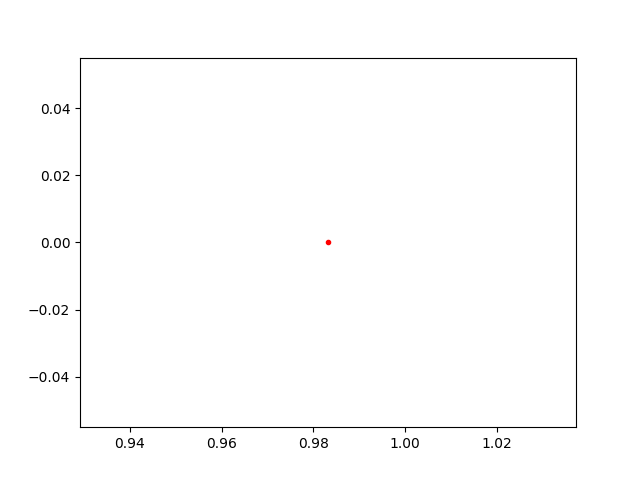

In [7]:
neuron_fig = plt.figure()
neuron_x = neuron_fig.add_subplot(1,1,1)
neuron_x_axis = [round(random.uniform(0.01,0.99),4)]

def update_neuron_params(i1,i2,i3,w1,w2,w3,b):
    i = [i1,i2,i3]
    w = [w1,w2,w3]
    y_point_neuron = neuron(i,w,b,relu)
    neuron_x_axis[0] = neuron_x_axis[0]+0.1*i1*i2*i3
    plt.plot(neuron_x_axis, [y_point_neuron], marker='o', markersize='3', color='red')
    neuron_fig.canvas.draw_idle()
interact(update_neuron_params, i1=0.0, i2=0.0, i3=0.0,w1=0.0, w2=0.0, w3=0.0, b=0.0)

Dense Layer

In [10]:
def dense_layer(inputs_to_layer, number_of_neurons, activation_function, weights, biases):
    output=[]
    for i in range(number_of_neurons):
        output_from_one_neuron = neuron(inputs_to_layer, weights[i], biases[i], activation_function)
        output.append(output_from_one_neuron)
    return output

In [11]:
l1_weights = [[0] ,[0] ,[0] ,[0]]
l1_biases = [0 ,0 , 0 ,0]
l1_inputs = [0.4]
layer1 = dense_layer(l1_inputs, 4, relu, l1_weights, l1_biases)


In [12]:
print(layer1)

[0, 0, 0, 0]


In [13]:
l2_weights = [[0,0,0,0] ,[0,0,0,0] ,[0,0,0,0] ,[0,0,0,0]]
l2_biases = [0 ,0 , 0 ,0]
layer2 = dense_layer(layer1, 4, relu, l2_weights, l2_biases)


In [14]:
print(layer2)

[0, 0, 0, 0]


In [15]:
l3_weights =[[0,0,0,0] ,[0,0,0,0]]
l3_biases = [0 ,0]
layer3 = dense_layer(layer2, 2, relu, l3_weights, l3_biases)


In [16]:
print(layer3)

[0, 0]


In [17]:
def lin(x):
    return x

GridspecLayout(children=(FloatSlider(value=0.0, description='l1w11', layout=Layout(grid_area='widget001'), max…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
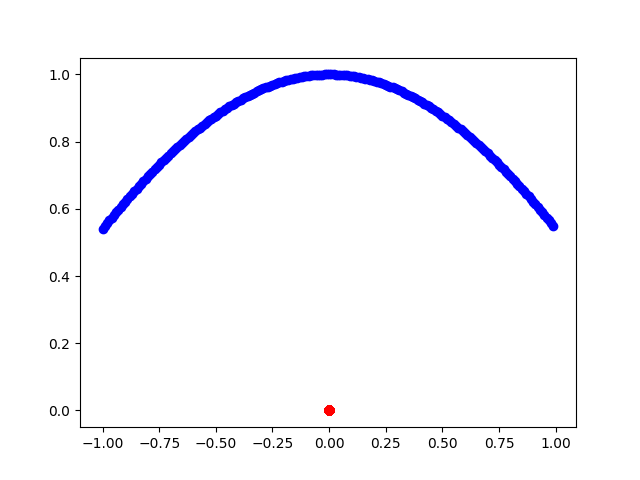

In [19]:
from ipywidgets import GridspecLayout
from math import cos
network_fig = plt.figure()



"""
model = {layer1: {inputs=1,neurons=3},
layer2: {inputs=3,neurons=3},
layer1: {inputs=3,neurons=2}}
"""



param = dict(value=0.0, min=-5.0, max=5.0, step=0.1, orientation='vertical')
def s(a):
    return widgets.FloatSlider(**param,description=a)



def update_weights_and_biases_for_network(l1w11,l1w21,l1w31,
                                            l1b1,l1b2,l1b3,
                                            l2w11,l2w12,l2w13,l2w21,l2w22,l2w23,l2w31,l2w32,l2w33,
                                            l2b1,l2b2,l2b3,
                                            l3w11,l3w12,l3w13,l3w21,l3w22,l3w23,
                                            l3b1,l3b2):
    layer1_weights = [[l1w11],[l1w21],[l1w31]]
    layer2_weights = [[l2w11,l2w12,l2w13],[l2w21,l2w22,l2w23],[l2w31,l2w32,l2w33]]
    layer3_weights = [[l3w11,l3w12,l3w13],[l3w21,l3w22,l3w23]]
    layer1_bias=[l1b1,l1b2,l1b3]
    layer2_bias=[l2b1,l2b2,l2b3]
    layer3_bias=[l3b1,l3b2]



    plt.clf()
    x_point_neuron1_output = network_fig.add_subplot(1, 1, 1)
    for i in range(-100,100):
        layer1 = dense_layer([i/100], 3, relu,layer1_weights, layer1_bias)
        layer2 = dense_layer(layer1, 3, relu,layer2_weights, layer2_bias)
        layer3 = dense_layer(layer2, 2, lin,layer3_weights, layer3_bias)
        x_point_neuron1_output = layer3[0]
        y_point_neuron2_output = layer3[1]
        #plt.scatter(x,y, c='b', marker='x', label='1')
        #plt.scatter(x, y, c='r', marker='s', label='-1')
        plt.scatter(i/100,cos(i/100), color="blue")
        plt.scatter(x_point_neuron1_output, y_point_neuron2_output, color="red")
        #plt.plot(x_point_neuron1_output, y_point_neuron2_output, marker='o', markersize=3, color="red")
    neuron_fig.canvas.draw_idle()



layer1 = ["l1w11","l1w21","l1w31","l1b1","l1b2","l1b3"]
layer2 = ["l2w11","l2w12","l2w13","l2w21","l2w22","l2w23","l2w31","l2w32","l2w33","l2b1","l2b2","l2b3"]
layer3 = ["l3w11","l3w12","l3w13","l3w21","l3w22","l3w23","l3b1","l3b2"]
network = [layer1,layer2,layer3]

grid = GridspecLayout(4, 13, height='650px')
control_dict = {}
for i in range(len(network)):
    for j in range(len(network[i])):
        grid[i, j] = s(network[i][j])
        control_dict.update( {network[i][j] : grid[i,j]} )
grid[3,0] = interactive_output(update_weights_and_biases_for_network, control_dict)
grid

Loss function

NameError: name 'labels' is not defined